# Mappng Eddy Subduction Events
#### MK

## Argo floats distribution

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.ticker as mticker
import os

In [9]:
# Set the path
path = "/home/mk0964/Documents/GLOBARGO/"

# Optionally, change the current working directory to this path
os.chdir(path)

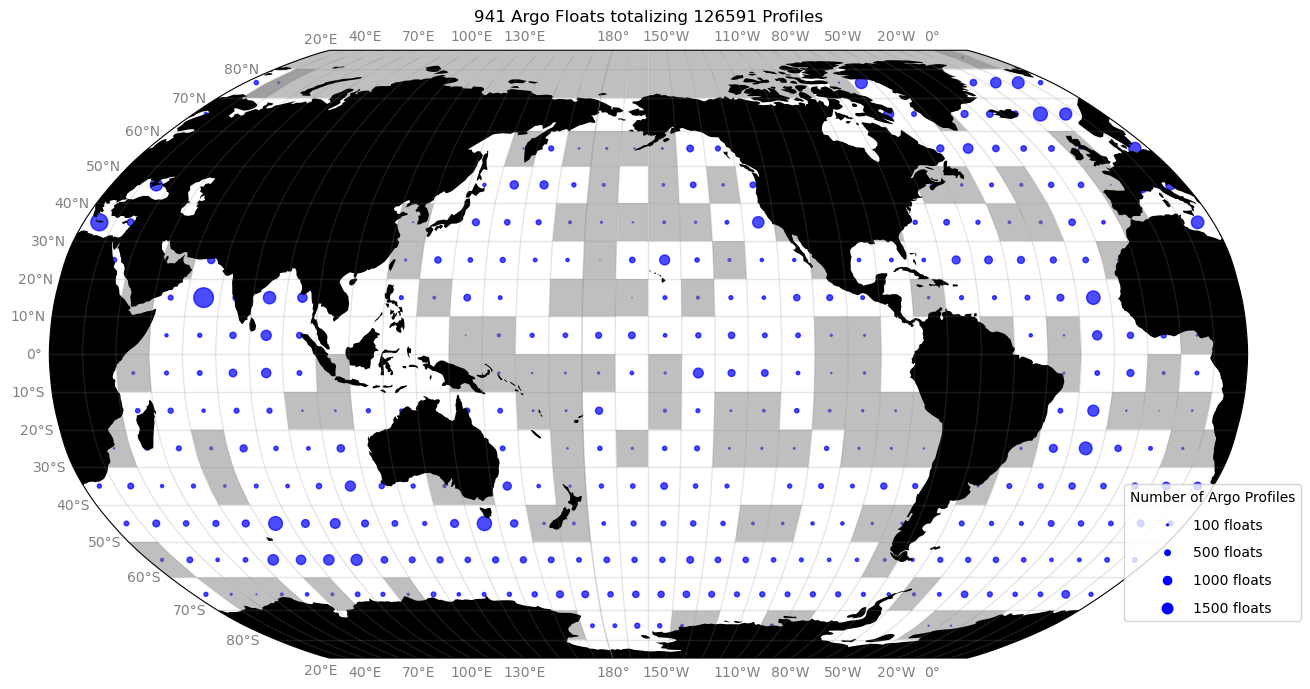

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.patches as patches

# Load your data
argo_count_data = pd.read_csv("/home/mk0964/Documents/GLOBARGO/data/argo_profiles_count.csv")

# Define the grid resolution (10x10 degrees)
resolution = 10

# Creating a regular grid
grid_lon = np.arange(argo_count_data['LON_BIN'].min(), argo_count_data['LON_BIN'].max() + resolution, resolution)
grid_lat = np.arange(argo_count_data['LAT_BIN'].min(), argo_count_data['LAT_BIN'].max() + resolution, resolution)
grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)

# Setup the map with Robinson projection
central_longitude = 200
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.Robinson(central_longitude=central_longitude)})

# Normalize the number of profiles to determine circle sizes
size_scale = 200 / argo_count_data['count'].max()  # Adjust the scaling factor as needed
circle_sizes = argo_count_data['count'] * size_scale

# Scatter plot for each data point
scatter = ax.scatter(argo_count_data['LON_BIN'], argo_count_data['LAT_BIN'],
                     s=circle_sizes,  # Circle sizes
                     c='blue',  # Circle color
                     alpha=0.7,
                     transform=ccrs.PlateCarree(),
                     zorder=1)  # Set zorder to 1 for the blue dots

# Fill the continents in black using the built-in LAND feature
ax.add_feature(cfeature.LAND, facecolor='black', edgecolor='none', zorder=2)  # Set zorder to 2 for the continents

# Add grey patches for regions with less than 100 profiles
for _, row in argo_count_data.iterrows():
    if row['count'] < 100:
        lon_bin = row['LON_BIN']
        lat_bin = row['LAT_BIN']
        rect = patches.Rectangle((lon_bin - resolution/2, lat_bin - resolution/2),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# CORRECTION for bug in the code that won't display grey patches of undersampled areas if there's no floats at all :

# Add grey patches for regions north of 70°N and 80°N
for lon in np.arange(30, 270, resolution):
    for lat in np.arange(70, 80, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Add patch north of 80
for lon in np.arange(-180, 180, resolution):
    for lat in np.arange(80, 90, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)


# Add patch north of 80
for lon in np.arange(170,190, resolution):
    for lat in np.arange(10, 20, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)


####################### END of CORRECTION ###################################################################

plt.title('941 Argo Floats totalizing 126591 Profiles')

# Define representative sizes for the number of floats and their corresponding labels
size_legend = [100, 500, 1000, 1500]  # Example sizes for legend
labels = ['100 floats', '500 floats', '1000 floats', '1500 floats']  # Update labels accordingly

# Calculate the size of the legend handles based on the size_scale
legend_sizes = [size * size_scale for size in size_legend]

# Create legend handles manually
legend_handles = [plt.scatter([], [], s=size, label=label, color='blue', edgecolors='none')
                  for size, label in zip(legend_sizes, labels)]

# Add gridlines with 10x10 degree intervals
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='grey', alpha=0.2, linestyle='-')
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 10))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 91, 10))
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

# Add the size legend to the plot, positioned at the bottom right of the figure
legend = ax.legend(handles=legend_handles, title='Number of Argo Profiles', loc='lower right',
                   scatterpoints=1, frameon=True, labelspacing=1, title_fontsize='medium',
                   bbox_to_anchor=(1.05, 0.05))

# Adjust figure size and layout to make space for the legend
fig.set_size_inches(14, 7)
plt.tight_layout()

# Save the figure with bbox_inches='tight' to include the legend in the saved image
plt.savefig('figures/Maps/argo_float_count_circles.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


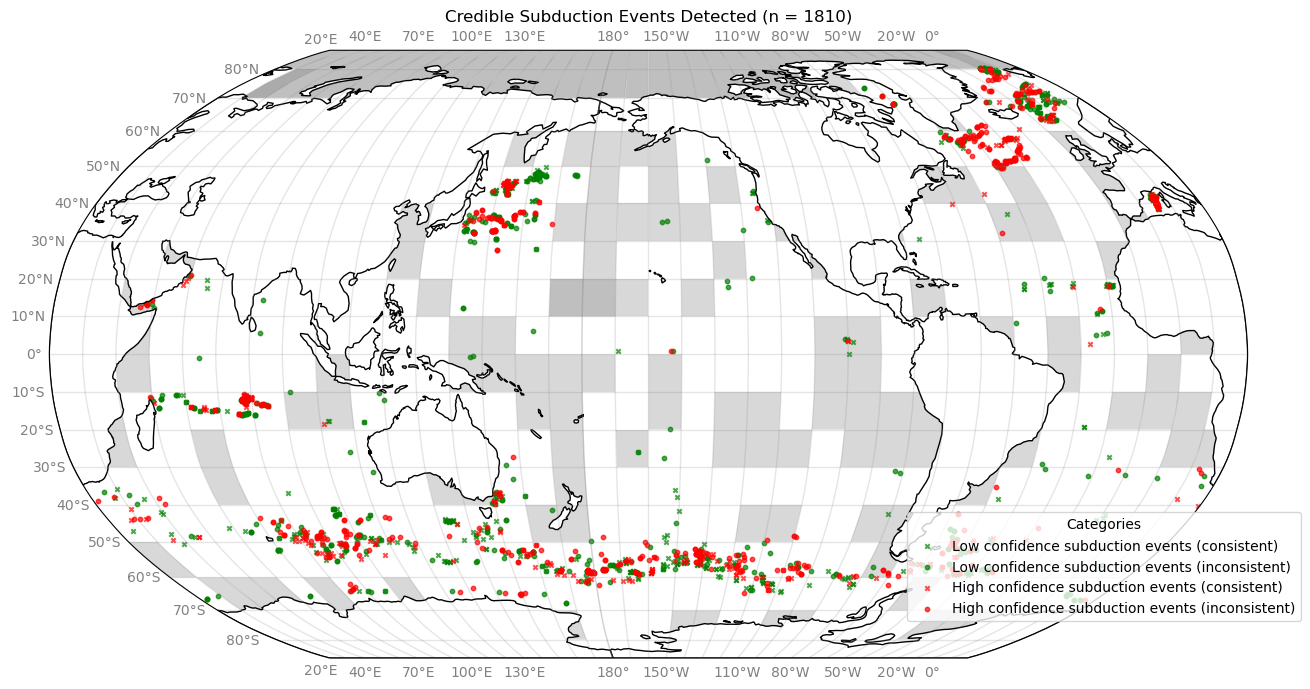

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.patches as patches

# Load your data
argo_count_data = pd.read_csv("data/argo_profiles_count.csv")
event_data = pd.read_csv("data/classification_results_manually_classified_merged.csv")

# Define the grid resolution (10x10 degrees)
resolution = 10

# Bin the data for profile counts
argo_count_data['LON_BIN'] = (argo_count_data['LON_BIN'] // resolution) * resolution
argo_count_data['LAT_BIN'] = (argo_count_data['LAT_BIN'] // resolution) * resolution

# Calculate the number of profiles in each bin
bin_counts = argo_count_data.groupby(['LON_BIN', 'LAT_BIN']).sum().reset_index()

# Setup the map with Robinson projection
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson(central_longitude=200)})

# Add grey patches for regions with fewer than 100 profiles
for _, row in bin_counts.iterrows():
    if row['count'] < 100:
        lon_bin = row['LON_BIN']
        lat_bin = row['LAT_BIN']
        rect = patches.Rectangle((lon_bin, lat_bin),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.3,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Define a color map for the categories
color_map = {1: 'red', 2: 'green'}  # Adjust colors as needed

# Define category labels
category_labels = {
    1: "High confidence subduction events",
    2: "Low confidence subduction events"
}

# Correction for bug in the code that won't display grey patches of undersampled areas if there's no floats at all
# Add grey patches for regions north of 70°N and 80°N
for lon in np.arange(30, 270, resolution):
    for lat in np.arange(70, 80, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Add patch north of 80
for lon in np.arange(-180, 180, resolution):
    for lat in np.arange(80, 90, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Add patch north of 80
for lon in np.arange(170, 190, resolution):
    for lat in np.arange(10, 20, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# End of correction

# Filter the data to include only Category 1 and Category 2
event_data_filtered = event_data[event_data['Category'].isin([1, 2])]

# Define markers for consistent and inconsistent anomalies
marker_map = {0: 'o', 1: 'x'}  # 'o' for inconsistent, 's' for consistent

# Scatter plot for each data point with different colors and markers based on the category and consistency
for category in event_data_filtered['Category'].unique():
    for consistent_anom in event_data_filtered['CONSISTENT_ANOM'].unique():
        subset = event_data_filtered[(event_data_filtered['Category'] == category) & (event_data_filtered['CONSISTENT_ANOM'] == consistent_anom)]
        ax.scatter(subset['LONGITUDE'], subset['LATITUDE'],
                   s=10,  # Adjust the size of the markers
                   c=color_map[category],
                   marker=marker_map[consistent_anom],
                   alpha=0.7,
                   transform=ccrs.PlateCarree(),
                   label=f"{category_labels[category]} ({'consistent' if consistent_anom else 'inconsistent'})")

# Fill the continents in black using the built-in LAND feature
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black', zorder=2)  # Set zorder to 2 for the continents

plt.title('Credible Subduction Events Detected (n = 1810)')

# Add gridlines with 10x10 degree intervals
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='grey', alpha=0.2, linestyle='-')
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 10))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 91, 10))
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

# Add a legend for the categories
plt.legend(title='Categories', loc='lower right', frameon=True, title_fontsize='medium', bbox_to_anchor=(1.05, 0.05))

# Adjust figure size and layout to make space for the legend
fig.set_size_inches(14, 7)
plt.tight_layout()

# Save the figure with bbox_inches='tight' to include the legend in the saved image
plt.savefig('figures/Maps/subduction_events_map.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


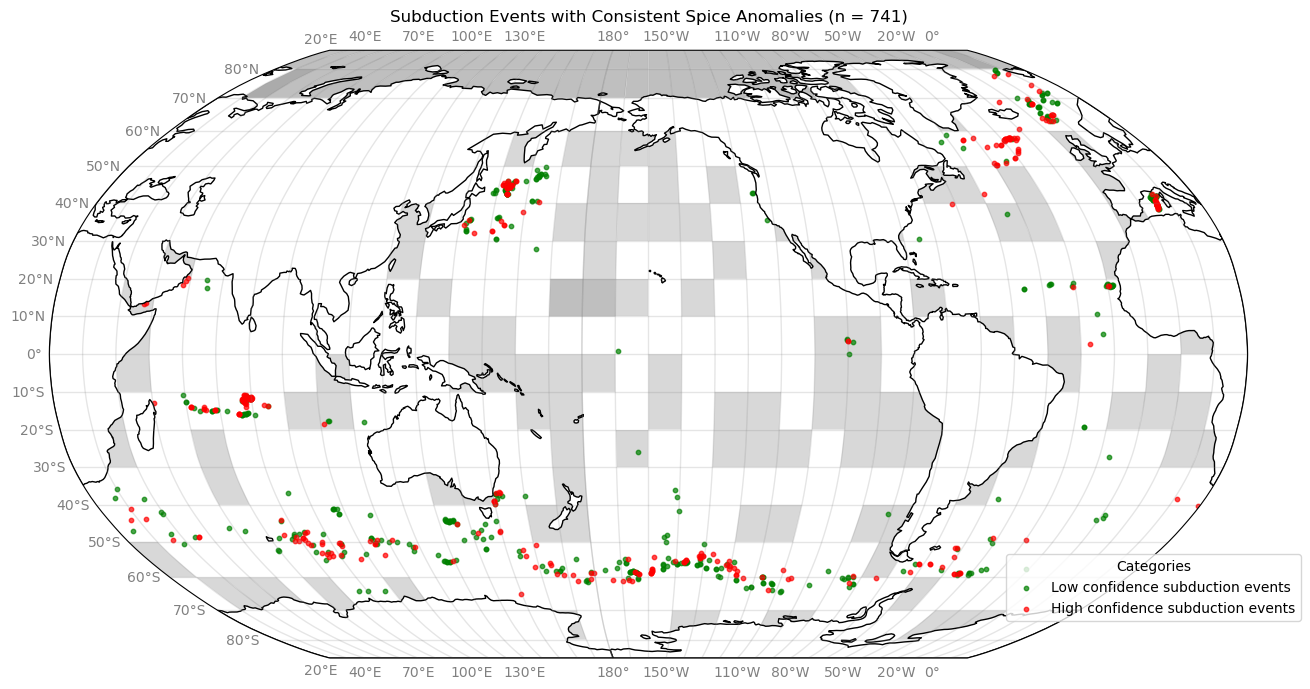

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.patches as patches

# Load your data
argo_count_data = pd.read_csv("data/argo_profiles_count.csv")
event_data = pd.read_csv("data/classification_results_manually_classified_merged.csv")

# Define the grid resolution (10x10 degrees)
resolution = 10

# Bin the data for profile counts
argo_count_data['LON_BIN'] = (argo_count_data['LON_BIN'] // resolution) * resolution
argo_count_data['LAT_BIN'] = (argo_count_data['LAT_BIN'] // resolution) * resolution

# Calculate the number of profiles in each bin
bin_counts = argo_count_data.groupby(['LON_BIN', 'LAT_BIN']).sum().reset_index()

# Setup the map with Robinson projection
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson(central_longitude=200)})

# Add grey patches for regions with fewer than 100 profiles
for _, row in bin_counts.iterrows():
    if row['count'] < 100:
        lon_bin = row['LON_BIN']
        lat_bin = row['LAT_BIN']
        rect = patches.Rectangle((lon_bin, lat_bin),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.3,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Define a color map for the categories
color_map = {1: 'red', 2: 'green'}  # Adjust colors as needed

# Define category labels
category_labels = {
    1: "High confidence subduction events",
    2: "Low confidence subduction events"
}

# Correction for bug in the code that won't display grey patches of undersampled areas if there's no floats at all
# Add grey patches for regions north of 70°N and 80°N
for lon in np.arange(30, 270, resolution):
    for lat in np.arange(70, 80, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Add patch north of 80
for lon in np.arange(-180, 180, resolution):
    for lat in np.arange(80, 90, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Add patch north of 80
for lon in np.arange(170, 190, resolution):
    for lat in np.arange(10, 20, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# End of correction

# Filter the data to include only Category 1 and Category 2 and consistent anomalies
event_data_filtered = event_data[(event_data['Category'].isin([1, 2])) & (event_data['CONSISTENT_ANOM'] == 1)]

# Scatter plot for each data point with different colors based on the category
for category in event_data_filtered['Category'].unique():
    subset = event_data_filtered[event_data_filtered['Category'] == category]
    ax.scatter(subset['LONGITUDE'], subset['LATITUDE'],
               s=10,  # Adjust the size of the markers
               c=color_map[category],
               alpha=0.7,
               transform=ccrs.PlateCarree(),
               label=category_labels[category])

# Fill the continents in black using the built-in LAND feature
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black', zorder=2)  # Set zorder to 2 for the continents

plt.title('Subduction Events with Consistent Spice Anomalies (n = 741)')

# Add gridlines with 10x10 degree intervals
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='grey', alpha=0.2, linestyle='-')
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 10))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 91, 10))
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

# Add a legend for the categories
plt.legend(title='Categories', loc='lower right', frameon=True, title_fontsize='medium', bbox_to_anchor=(1.05, 0.05))

# Adjust figure size and layout to make space for the legend
fig.set_size_inches(14, 7)
plt.tight_layout()

# Save the figure with bbox_inches='tight' to include the legend in the saved image
plt.savefig('figures/Maps/consistent_subduction_events_map.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


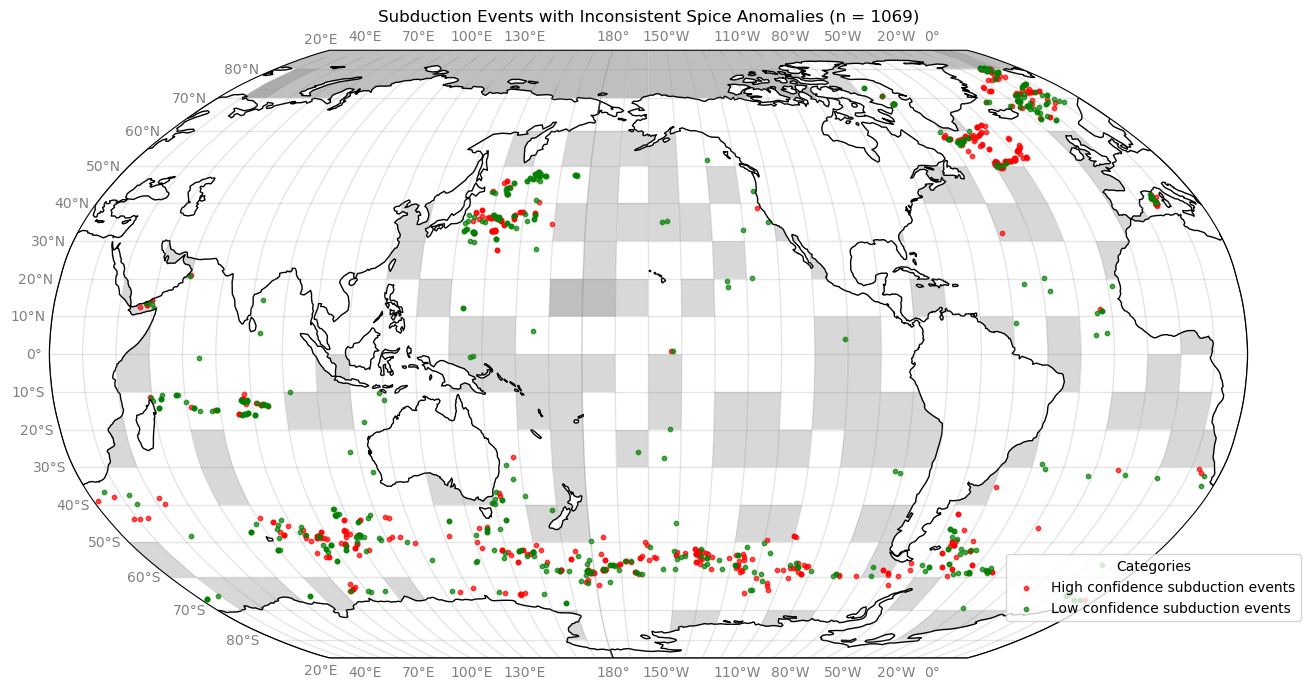

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.patches as patches

# Load your data
argo_count_data = pd.read_csv("data/argo_profiles_count.csv")
event_data = pd.read_csv("data/classification_results_manually_classified_merged.csv")

# Define the grid resolution (10x10 degrees)
resolution = 10

# Bin the data for profile counts
argo_count_data['LON_BIN'] = (argo_count_data['LON_BIN'] // resolution) * resolution
argo_count_data['LAT_BIN'] = (argo_count_data['LAT_BIN'] // resolution) * resolution

# Calculate the number of profiles in each bin
bin_counts = argo_count_data.groupby(['LON_BIN', 'LAT_BIN']).sum().reset_index()

# Setup the map with Robinson projection
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson(central_longitude=200)})

# Add grey patches for regions with fewer than 100 profiles
for _, row in bin_counts.iterrows():
    if row['count'] < 100:
        lon_bin = row['LON_BIN']
        lat_bin = row['LAT_BIN']
        rect = patches.Rectangle((lon_bin, lat_bin),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.3,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Define a color map for the categories
color_map = {1: 'red', 2: 'green'}  # Adjust colors as needed

# Define category labels
category_labels = {
    1: "High confidence subduction events",
    2: "Low confidence subduction events"
}

# Correction for bug in the code that won't display grey patches of undersampled areas if there's no floats at all
# Add grey patches for regions north of 70°N and 80°N
for lon in np.arange(30, 270, resolution):
    for lat in np.arange(70, 80, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Add patch north of 80
for lon in np.arange(-180, 180, resolution):
    for lat in np.arange(80, 90, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# Add patch north of 80
for lon in np.arange(170, 190, resolution):
    for lat in np.arange(10, 20, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax.add_patch(rect)

# End of correction

# Filter the data to include only Category 1 and Category 2 and consistent anomalies
event_data_filtered = event_data[(event_data['Category'].isin([1, 2])) & (event_data['CONSISTENT_ANOM'] == 0)]

# Scatter plot for each data point with different colors based on the category
for category in event_data_filtered['Category'].unique():
    subset = event_data_filtered[event_data_filtered['Category'] == category]
    ax.scatter(subset['LONGITUDE'], subset['LATITUDE'],
               s=10,  # Adjust the size of the markers
               c=color_map[category],
               alpha=0.7,
               transform=ccrs.PlateCarree(),
               label=category_labels[category])

# Fill the continents in black using the built-in LAND feature
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black', zorder=2)  # Set zorder to 2 for the continents

plt.title('Subduction Events with Inconsistent Spice Anomalies (n = 1069)')

# Add gridlines with 10x10 degree intervals
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='grey', alpha=0.2, linestyle='-')
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 10))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 91, 10))
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

# Add a legend for the categories
plt.legend(title='Categories', loc='lower right', frameon=True, title_fontsize='medium', bbox_to_anchor=(1.05, 0.05))

# Adjust figure size and layout to make space for the legend
fig.set_size_inches(14, 7)
plt.tight_layout()

# Save the figure with bbox_inches='tight' to include the legend in the saved image
plt.savefig('figures/Maps/inconsistent_subduction_events_map.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


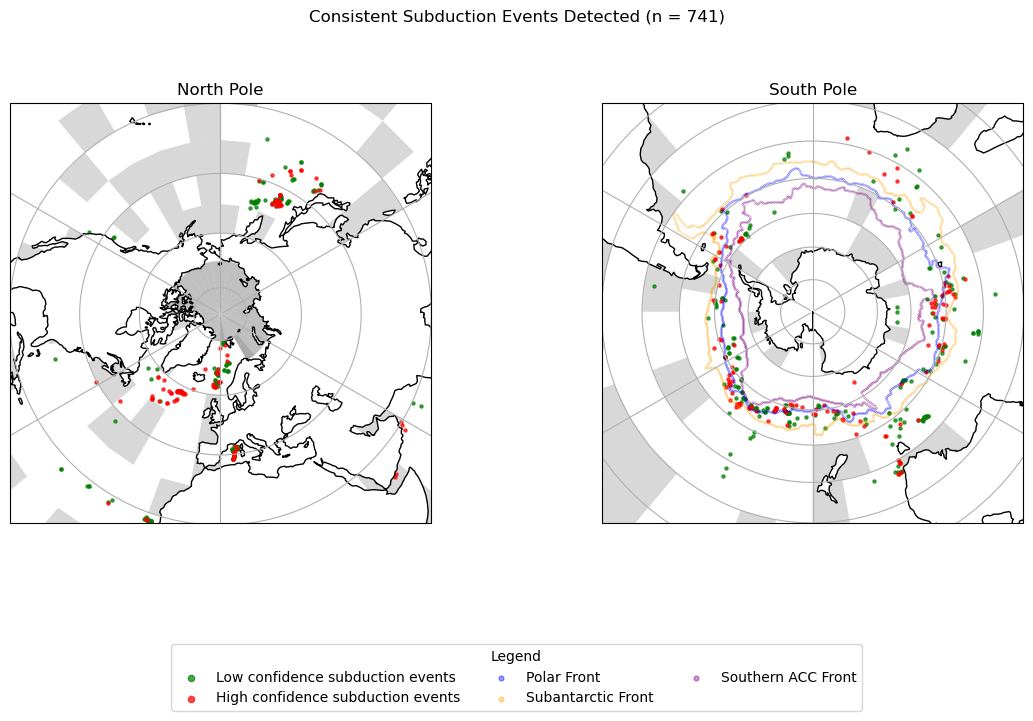

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import xarray as xr

# Load your data
event_data = pd.read_csv("data/classification_results_manually_classified_merged.csv")
argo_count_data = pd.read_csv("data/argo_profiles_count.csv")
fronts = xr.open_dataset('data/orsi_park_durand_so_fronts.nc')

# Define the grid resolution (10x10 degrees)
resolution = 10

# Bin the data for profile counts
argo_count_data['LON_BIN'] = (argo_count_data['LON_BIN'] // resolution) * resolution
argo_count_data['LAT_BIN'] = (argo_count_data['LAT_BIN'] // resolution) * resolution

# Calculate the number of profiles in each bin
bin_counts = argo_count_data.groupby(['LON_BIN', 'LAT_BIN']).sum().reset_index()

# Define a color map for the categories
color_map = {1: 'red', 2: 'green'}  # Adjust colors as needed

# Define category labels
category_labels = {
    1: "High confidence subduction events",
    2: "Low confidence subduction events"
}

# Filter the data to include only consistent anomalies (CONSISTENT_ANOM == 1)
event_data_filtered = event_data[(event_data['CONSISTENT_ANOM'] == 1) & (event_data['Category'].isin([1, 2]))]

# Create a figure with two subplots for the North Pole and South Pole
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               subplot_kw={'projection': ccrs.NorthPolarStereo()})

# Set the title for the entire figure
fig.suptitle('Consistent Subduction Events Detected (n = 741)')

# North Pole map
for _, row in bin_counts.iterrows():
    if row['count'] < 100:
        lon_bin = row['LON_BIN']
        lat_bin = row['LAT_BIN']
        if lat_bin >= 0:
            rect = patches.Rectangle((lon_bin, lat_bin),
                                     resolution, resolution,
                                     linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.3,
                                     transform=ccrs.PlateCarree())
            ax1.add_patch(rect)

# Correction for bug in the code that won't display grey patches of undersampled areas if there's no floats at all
for lon in np.arange(30, 270, resolution):
    for lat in np.arange(70, 80, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax1.add_patch(rect)

for lon in np.arange(-180, 180, resolution):
    for lat in np.arange(80, 90, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax1.add_patch(rect)

for lon in np.arange(170, 190, resolution):
    for lat in np.arange(10, 20, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax1.add_patch(rect)
# End of correction

for category in event_data_filtered['Category'].unique():
    subset = event_data_filtered[event_data_filtered['Category'] == category]
    subset_north = subset[subset['LATITUDE'] >= 0]
    ax1.scatter(subset_north['LONGITUDE'], subset_north['LATITUDE'],
                s=5,  # Adjust the size of the markers
                c=color_map[category],
                alpha=0.7,
                transform=ccrs.PlateCarree(),
                label=category_labels[category])

ax1.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax1.gridlines()
ax1.set_title('North Pole')

# South Pole map
ax2.projection = ccrs.SouthPolarStereo()

for _, row in bin_counts.iterrows():
    if row['count'] < 100:
        lon_bin = row['LON_BIN']
        lat_bin = row['LAT_BIN']
        if lat_bin < 0:
            rect = patches.Rectangle((lon_bin, lat_bin),
                                     resolution, resolution,
                                     linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.3,
                                     transform=ccrs.PlateCarree())
            ax2.add_patch(rect)

# Correction for bug in the code that won't display grey patches of undersampled areas if there's no floats at all
for lon in np.arange(30, 270, resolution):
    for lat in np.arange(70, 80, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax2.add_patch(rect)

for lon in np.arange(-180, 180, resolution):
    for lat in np.arange(80, 90, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax2.add_patch(rect)

for lon in np.arange(170, 190, resolution):
    for lat in np.arange(10, 20, resolution):
        rect = patches.Rectangle((lon, lat),
                                 resolution, resolution,
                                 linewidth=0.5, edgecolor='none', facecolor='grey', alpha=0.5,
                                 transform=ccrs.PlateCarree())
        ax2.add_patch(rect)
# End of correction

for category in event_data_filtered['Category'].unique():
    subset = event_data_filtered[event_data_filtered['Category'] == category]
    subset_south = subset[subset['LATITUDE'] < 0]
    ax2.scatter(subset_south['LONGITUDE'], subset_south['LATITUDE'],
                s=5,  # Adjust the size of the markers
                c=color_map[category],
                alpha=0.7,
                transform=ccrs.PlateCarree(),
                label=category_labels[category])

ax2.set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
ax2.gridlines()
ax2.set_title('South Pole')

# Fill the continents in black using the built-in LAND feature
for ax in [ax1, ax2]:
    ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black', zorder=2)  # Set zorder to 2 for the continents

# Plot fronts with new colors and add to legend
pf = ax1.scatter(fronts.LonPF, fronts.LatPF, c='blue', transform=ccrs.PlateCarree(), s=3, alpha=0.4)
saf = ax1.scatter(fronts.LonSAF, fronts.LatSAF, c='orange', transform=ccrs.PlateCarree(), s=3, alpha=0.4)
saccf = ax1.scatter(fronts.LonSACCF, fronts.LatSACCF, c='purple', transform=ccrs.PlateCarree(), s=3, alpha=0.4)
ax2.scatter(fronts.LonPF, fronts.LatPF, c='blue', transform=ccrs.PlateCarree(), s=.01, alpha=0.4, label='Polar Front')
ax2.scatter(fronts.LonSAF, fronts.LatSAF, c='orange', transform=ccrs.PlateCarree(), s=.01, alpha=0.4, label='Subantarctic Front')
ax2.scatter(fronts.LonSACCF, fronts.LatSACCF, c='purple', transform=ccrs.PlateCarree(), s=.01, alpha=0.4, label='Southern ACC Front')

# Add a legend for the categories and fronts
handles, labels = ax1.get_legend_handles_labels()
handles.extend([pf, saf, saccf])
labels.extend(['Polar Front', 'Subantarctic Front', 'Southern ACC Front'])
fig.legend(handles=handles, labels=labels, title='Legend', loc='lower center', frameon=True, title_fontsize='medium', bbox_to_anchor=(0.5, -0.2), ncol=3, markerscale=2)

# Adjust the spacing between subplots
plt.tight_layout(rect=[0, 0.1, 1, 0.9])

# Save the figure with bbox_inches='tight' to include the legend in the saved image
plt.savefig('figures/Maps/consistent_subduction_events_map_polar.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
